# Name: Rishwanth Mithra
# Registration Number: 2311566
# Course ID: MA336

# Introduction
Sentiment Analysis is a use of natural language processing and text analytics to identify, extract and study the states of feature information systematically. Sentiment analysis is widely used for customer reviews and survey responses, as well as for applications in the social media and healthcare sectors. The basic task in sentiment analysis is classifying the feature or variable as positive, negative or neutral. The classification looks for emotional states such as happiness, sadness, anger, fear, surprise or many other conditions and trains these circumstances to predict the classifications.

The aim in this project is to build a model that can predict whether a given movie review is positive or negative using the dataset of IMDB movie reviews. The model can predict the classification based on the reviews given by the viewers by targeting certain words which define the exact emotion about the movie to classify it as positive or negative.
I have taken the dataset from Kaggle, shown in the link 
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
Since the size of the dataset is 64 MB, I'm attaching the link here. 
The dataset contains 50,000 rows of data containing reviews and sentiments. 
After importing the data, I presented the text preprocessing techniques, modelled the data for sentiment analysis, trained the model and evaluated it. This can help us to recommend the viewers to watch a certain movie based on positive or negative responses.


In [1]:
import pandas as pd

Importing the necessary libraries 

In [2]:
# Import the dataset
df2=pd.read_csv('IMDB.csv')
df2

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Reading the IMDB Dataset file which has 50000 rows and 2 columns with the help of pandas library

# Data Preprocessing

In [3]:
# erasing certain characters
df2['review'] = df2['review'].str.replace('READ MORE','')

Clearing out the frequent words 'READ MORE' which contains in each row

In [4]:
df2

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Convert to lower case

In [5]:
# Converting the characters to lower case 
df2 = df2.applymap(lambda s: s.lower() if type(s) == str else s)


Converting the input text into the same casing format so that they are treated in the same way. Using the lower() function, it is helpful for text featurization techniques.

In [6]:
df2

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


# Handle emoji's

In [7]:
# Handling the emoji's 
df2.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


Handling the emoji's to boost the classification accuracy and handle the out-of-vocabulary issue. Replacing the emoji's with the text gives the good result in representing the sentiment which can result in variety of positive and negative emotions using encode and decode functions.

# Remove special characters

In [8]:
import re

# Remove special characters 
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    # Replace special characters with empty string
    text = re.sub(pattern, '', text)
    return text

# Function to remove special characters 
df2['review'] = df2['review'].apply(remove_special_characters)

print(df2)

                                                  review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production br br the filmin...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically theres a family where a little boy j...  negative
4      petter matteis love in the time of money is a ...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  im going to have to disagree with the previous...  negative
49999  no one expects the star trek movies to be high...  negative

[50000 rows x 2 columns]


Removing the special characters and puntuations from the text data helps to standardize the process that treats the words having special characters and words not having to be one and the same. We are replacing the special characters with the empty string for each review in the dataset.

# Remove Frequent Words

In [9]:
# Replacing the frequent word 
df2['review'] = df2['review'].str.replace(' br', '')
df2

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


Frequent words are almost always devoid of meaning. We are replacing the word 'br' with empty string which can be seen repeatedly used for tags.

In [10]:
# Check for null values
df2['review'].isna().sum()

0

Checking for null values by using the isna() function.

In [11]:
df2

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


# Tokenizing the Data

In [12]:
# Import the nltk library
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
# Tokenizing the data for certain range of rows
df2['review'][:1000]= df2['review'][:1000].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to C:\Users\Rishwanth
[nltk_data]     Mithra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
df2['review'][1001:2000]= df2['review'][1001:2000].apply(lambda x: word_tokenize(x))

In [14]:
df2['review'][2001:3000]= df2['review'][2001:3000].apply(lambda x: word_tokenize(x))

In [15]:
df2['review'][3001:4000]= df2['review'][3001:4000].apply(lambda x: word_tokenize(x))

In [16]:
df2['review'][4001:5000]= df2['review'][4001:5000].apply(lambda x: word_tokenize(x))

Tokenization breaks texts to smaller parts for machine to analyze the texts easily. The splitted parts are called tokens and these can be characters or words. The algorithms can feasibly identify the patterns as it makes machine to analyze and respond to human inputs. We are performing tokenization for first 5000 rows step by step having 1000 rows to be each interval. The reason for splitting the tokenization process is that processor does not consume huge memory and helps to convert the data into tokens faster.

In [17]:
# Assigning the data to a variable
data = df2[:5000]
data

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",positive
1,"[a, wonderful, little, production, the, filmin...",positive
2,"[i, thought, this, was, a, wonderful, way, to,...",positive
3,"[basically, theres, a, family, where, a, littl...",negative
4,"[petter, matteis, love, in, the, time, of, mon...",positive
...,...,...
4995,"[an, interesting, slasher, film, with, multipl...",negative
4996,"[i, watched, this, series, when, it, first, ca...",positive
4997,"[once, again, jet, liings, his, charismatic, p...",positive
4998,"[i, rented, this, movie, after, hearing, chris...",negative


In [18]:
data2 = data

# Stopwords Removal 

In [19]:
# Downloading the stopword package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Rishwanth
[nltk_data]     Mithra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# Importing the library
from nltk.corpus import stopwords

In [21]:
stopwords = nltk.corpus.stopwords.words('english')

In [22]:
# Function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
# Using the function to remove stopwords
data2['review']= data2['review'].apply(lambda x:remove_stopwords(x))

C:\Users\Rishwanth Mithra\AppData\Local\Temp\ipykernel_32408\2911964138.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['review']= data2['review'].apply(lambda x:remove_stopwords(x))


Removing stopwords is useful when we deal with most semantically dominant words in a text and ignore the words that are irrelavent in the text such as articles and prepositions. By this process, the model can improve the accuracy of the tasks and reduce computational resources needed for processing.

In [23]:
data2

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, theres, family, little, boy, jake,...",negative
4,"[petter, matteis, love, time, money, visually,...",positive
...,...,...
4995,"[interesting, slasher, film, multiple, suspect...",negative
4996,"[watched, series, first, came, 70si, 14, years...",positive
4997,"[jet, liings, charismatic, presence, movie, sc...",positive
4998,"[rented, movie, hearing, chris, gore, saying, ...",negative


# Lemmatization

In [24]:
# Downloading the package
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
# Defining the object
wordnet_lemmatizer = WordNetLemmatizer()
# Defining the function
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
# Using the function for lemmatization
data2['review']=data2['review'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to C:\Users\Rishwanth
[nltk_data]     Mithra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\Rishwanth Mithra\AppData\Local\Temp\ipykernel_32408\2627114491.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['review']=data2['review'].apply(lambda x:lemmatizer(x))


We have not used stemming in data pre-processing as stemming removes last few characters from a word which leads to incorrect meaning. Hence, we have used Lemmatization which breaks the word down to its root meaning to identify the similarities. It uses corpus for stopwords and wordNet corpus to produce the exact meaning of the word.The algorithm knows that the word 'better' is derived from the word 'good' and hence it converts 'better' to 'good' which is the stem meaning.

In [25]:
data2

,review,sentiment
0,"[one, reviewer, mentioned, watching, 1, oz, ep...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, there, family, little, boy, jake, ...",negative
4,"[petter, matteis, love, time, money, visually,...",positive
...,...,...
4995,"[interesting, slasher, film, multiple, suspect...",negative
4996,"[watched, series, first, came, 70si, 14, year,...",positive
4997,"[jet, liings, charismatic, presence, movie, sc...",positive
4998,"[rented, movie, hearing, chris, gore, saying, ...",negative


# Sequencing and Padding

In [26]:
# Installing the tensorflow package
!pip install tensorflow

# Importing the necessary libraries for sequencing and padding
import tensorflow
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [27]:
# using tokenizer for sequencing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data2['review'])
seq_token=tokenizer.texts_to_sequences(data2['review'])

We are defining tokenizer object and mapping to sentences. The fit_on_text updates the internal vocabulary based on list of texts. The input list sentences is converted to integer sequence by using text_to_sequence function.

Sequencing helps to convert the text data to integer data which makes the model to perform logically to produce the good accuracy score.

In [28]:
# padding (adding zero's to be equal to the length of big list)
seq_token = pad_sequences(seq_token, maxlen=1000)
seq_token.shape

(5000, 1000)

Padding is used to add zero's to the sequenced data so that it helps to make all sequences in a batch fit a given standard length. It is helpful as it standardizes the input data by making all sequences to the same length.

In [29]:
# Creating the function to convert data to binary values
def output(val):
    if val=='positive':
        return 1
    else:
        return 0
data2['sentiment']= data2['sentiment'].apply(lambda x:output(x))

C:\Users\Rishwanth Mithra\AppData\Local\Temp\ipykernel_32408\1891109593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['sentiment']= data2['sentiment'].apply(lambda x:output(x))


We are creating an output function to convert the value of positive to 1 and negative to 0 and applying it to feature of the dataset.

# Exploratory Data Analysis

In [389]:
print('Positive reviews = ', (round(data2['sentiment'].value_counts()[0])),'which is', round(data2['sentiment'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Negative reviews = ', (round(data2['sentiment'].value_counts()[1])),'which is',round(data2['sentiment'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Positive reviews =  2532 which is 50.64 % of the dataset
Negative reviews =  2468 which is 49.36 % of the dataset


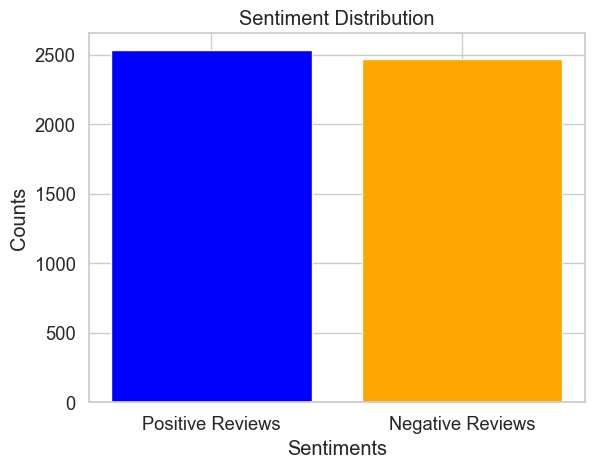

In [434]:
import matplotlib.pyplot as plt

# Assigning the values
s = ['Positive Reviews', 'Negative Reviews']
c = [2532, 2468]

# Plot the histogram
plt.bar(s, c, color=['blue', 'orange'])
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.title('Sentiment Distribution')
plt.show()

The above plot gives the histogram for the number of positive and negative reviews.

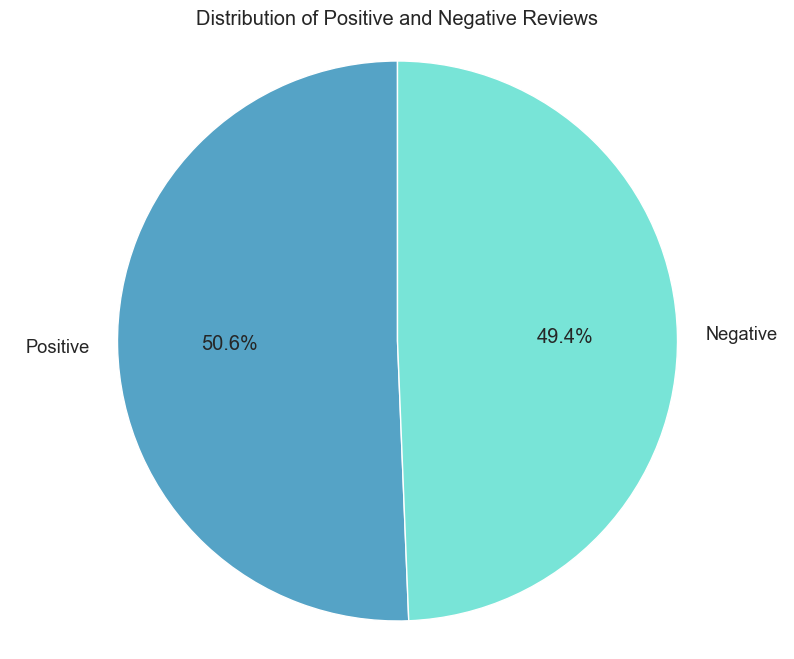

In [235]:
# Initializing Percentage values
pos_percent = 50.64
neg_percent = 49.36

# Pie chart
labelings = 'Positive', 'Negative'
values = [pos_percent, neg_percent]
col = ['#55a3c6', '#78e4d7']  


plt.figure(figsize=(10, 8)) 
plt.pie(values,  labels=labelings, colors=col,autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Positive and Negative Reviews')
plt.axis('equal')

plt.show()

The above plot gives the pie chart for the percentage of postive and negative reviews.

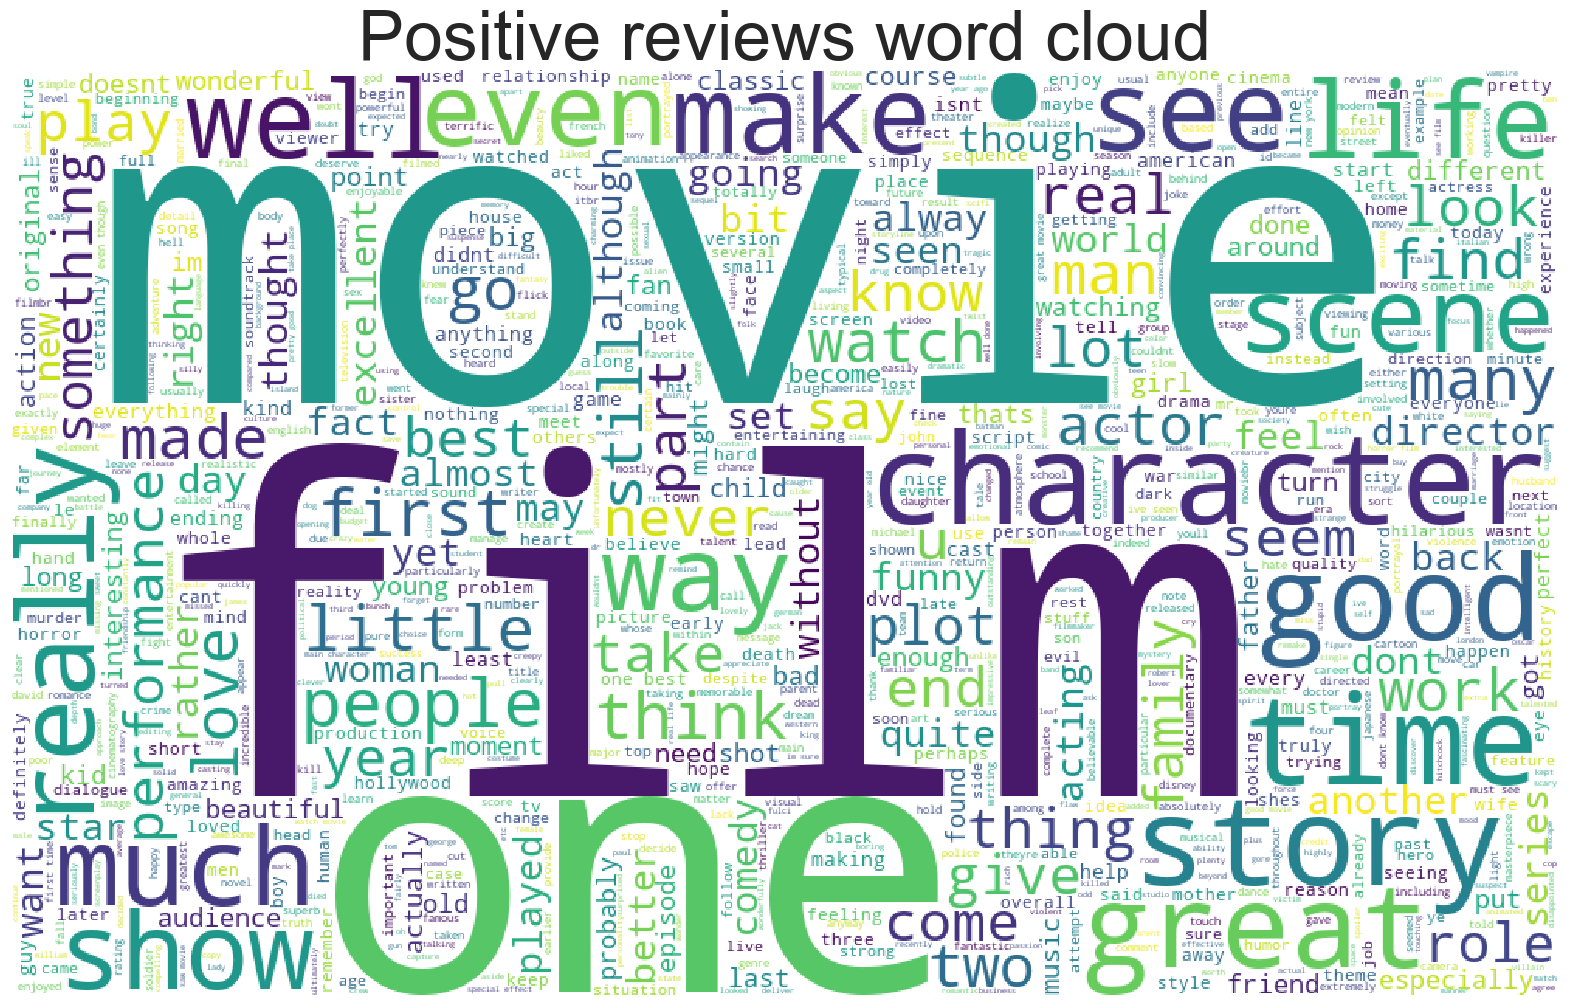

In [435]:
# Word cloud for positive reviews
positive_data = data2[data2['sentiment']==1]['review']
positive_data_string = ' '.join([' '.join(data) for data in positive_data])
plt.figure(figsize = (20,18))
wc = WordCloud(max_words = 2500, width=1000, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'nearest')
plt.axis('off')
plt.title('Positive reviews word cloud',fontsize = 50)
plt.show()

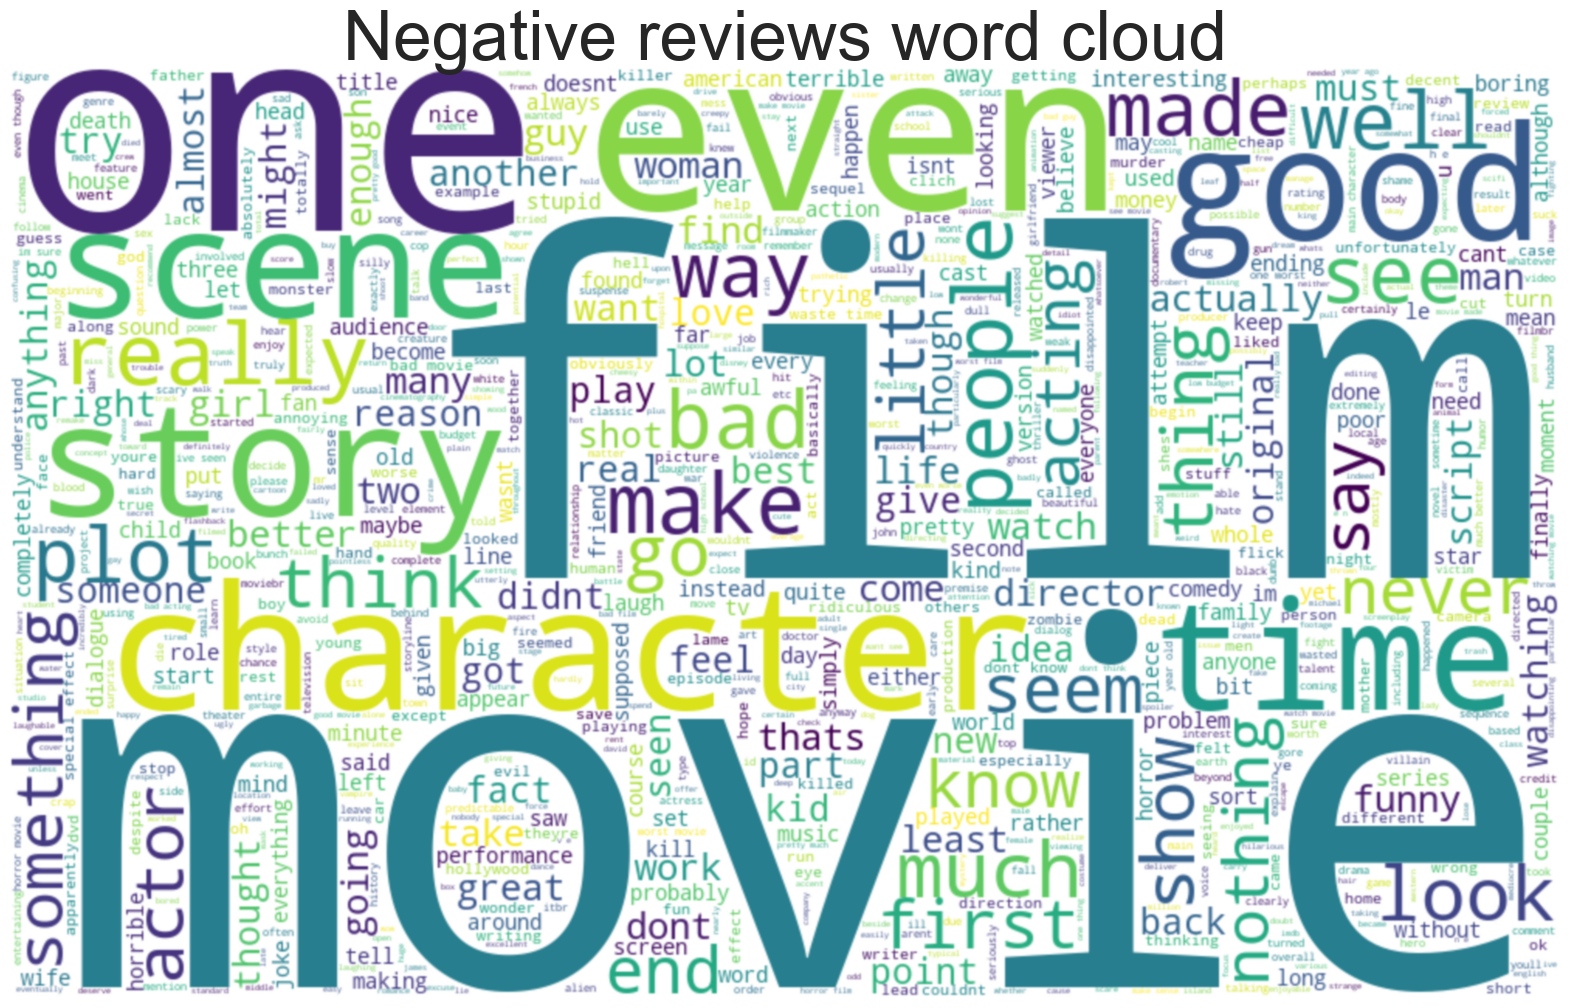

In [436]:
# Word cloud for negative reviews
negative_data = data2[data2['sentiment']==0]['review']
negative_data_string = ' '.join([' '.join(data) for data in negative_data])
plt.figure(figsize = (20,18))
wc = WordCloud(max_words = 2500, width=1000, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bicubic')
plt.axis('off')
plt.title('Negative reviews word cloud',fontsize = 50)
plt.show()

The above data gives the word cloud for positive and negative reviews of the dataset.

In [30]:
# Importing the library to split the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(seq_token, data2['sentiment'],test_size=0.2)

We are splitting the whole data to 80% train data and 20% test data to train and test the models.

In [31]:
X_train.shape

(4000, 1000)

In [213]:
X_test.shape

(1000, 1000)

In [214]:
y_train.shape

(4000,)

In [215]:
y_test.shape

(1000,)

In [392]:
data2

,review,sentiment
0,"[one, reviewer, mentioned, watching, 1, oz, ep...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, there, family, little, boy, jake, ...",0
4,"[petter, matteis, love, time, money, visually,...",1
...,...,...
4995,"[interesting, slasher, film, multiple, suspect...",0
4996,"[watched, series, first, came, 70si, 14, year,...",1
4997,"[jet, liings, charismatic, presence, movie, sc...",1
4998,"[rented, movie, hearing, chris, gore, saying, ...",0


# Machine Learning Models

# Logistic Regression

In [31]:
# import necessary libraries
from sklearn.linear_model import LogisticRegression

# Defining the model
logistic = LogisticRegression(random_state=100)

# Fit the model
logistic.fit(X_train, y_train)



C:\Users\Rishwanth Mithra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

We are defining Logistic regression which is a machine learning model with the parameter random state having the value 100 which helps to give the same definite result. And we are fitting the model with the train sets.

In [32]:
# Predicting the model
y_pred = logistic.predict(X_test)

Predicting the model with the test sets of input feature.

In [33]:
# Printing the metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.48      0.49       507
           1       0.49      0.52      0.51       493

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000



The accuracy of the logistic model with the given parameters is 0.50 and we can also view the precision, recall and f1-score for both the classification.

In [35]:
# Confusion Matrix
from sklearn import metrics

# Calculating confusion matrix
cmatrix = metrics.confusion_matrix(y_test, y_pred)
cmatrix

array([[240, 267],
       [233, 260]], dtype=int64)

We are importing metrics for calculating the confusion matrix based on the predicted scores.

In [36]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 427.9555555555555, 'Predicted values')

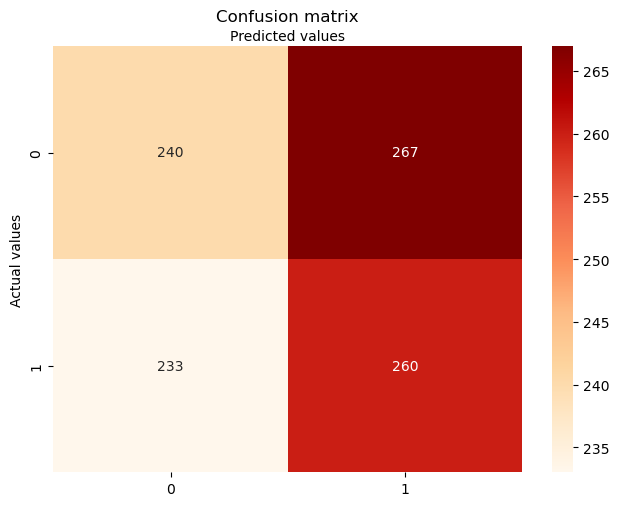

In [37]:
# Plotting the graph
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cmatrix), annot=True, cmap="OrRd" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

# Tuning parameters for Logistic Regression

In [39]:
# Performing grid search using logistic regression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
lr_clf = GridSearchCV(lr, {
    'solver':['liblinear','saga'],
    'random_state':[42,52]
}, cv=5, return_train_score=False)

Grid search cross validation is a method to search through the best parameter values from the given set of parameters. It basically divides the data into training sets and test set and performs cross validations by iterating through the different sets. Here, we have given cv value to be 5 which divides the data to 4 train and 1 test sets. We have used two different values for random state to give same results for each definite values of parameters and two different solvers which helps in optimization problems by performing minimization along the co-ordinates. 

In [40]:
# Fit the classifier to the data
lr_clf.fit(X_train, y_train)
lr_clf.cv_results_ 

C:\Users\Rishwanth Mithra\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Rishwanth Mithra\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Rishwanth Mithra\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Rishwanth Mithra\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Rishwanth Mithra\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Rishwanth Mithra\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:35

{'mean_fit_time': array([21.62667871,  5.30948758, 21.88899207,  5.09411926]),
 'std_fit_time': array([5.27030216, 0.28069812, 5.52411503, 0.27920844]),
 'mean_score_time': array([0.01088228, 0.00624485, 0.00405259, 0.00312481]),
 'std_score_time': array([0.00627981, 0.00764836, 0.00602405, 0.00624962]),
 'param_random_state': masked_array(data=[42, 42, 52, 52],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['liblinear', 'saga', 'liblinear', 'saga'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'random_state': 42, 'solver': 'liblinear'},
  {'random_state': 42, 'solver': 'saga'},
  {'random_state': 52, 'solver': 'liblinear'},
  {'random_state': 52, 'solver': 'saga'}],
 'split0_test_score': array([0.4975, 0.4975, 0.4975, 0.4975]),
 'split1_test_score': array([0.49625, 0.48875, 0.49625, 0.48875]),
 'split2_test_score': array([0.535 

We are fitting the hypertuned model for the trianed data sets and viewing the results for different parameters.

In [77]:
lr_dfs = pd.DataFrame(lr_clf.cv_results_)
lr_dfs[['params','mean_test_score']]

,params,mean_test_score
0,"{'random_state': 42, 'solver': 'liblinear'}",0.4945
1,"{'random_state': 42, 'solver': 'saga'}",0.5000
2,"{'random_state': 52, 'solver': 'liblinear'}",0.4945
3,"{'random_state': 52, 'solver': 'saga'}",0.5000


The above table gives the information of parameters used and the mean test scores.

In [75]:
lr_clf.best_params_

{'random_state': 42, 'solver': 'saga'}

The above parameters are the best parameters to be used to perform logistic regression.

In [42]:
# import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Defining the model
logistic = LogisticRegression(solver = 'saga',random_state=42)

# Fit the model
logistic.fit(X_train, y_train)
# Predicting the model
y_pred = logistic.predict(X_test)
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


C:\Users\Rishwanth Mithra\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


After finding the best parameters, we are defining the logistic regression model which gives the best result.

In [79]:
# Printing the metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.45      0.49       535
           1       0.46      0.55      0.50       465

    accuracy                           0.49      1000
   macro avg       0.50      0.50      0.49      1000
weighted avg       0.50      0.49      0.49      1000



The accuracy is 0.49 after performing hypertuning for the logistic regression model.

# Support Vector Machine (SVM)

In [193]:
# Importing the necessary libraries
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score




In [221]:
# Converting the tokenized sequences to text
SVM_train_text = [' '.join(map(str, i)) for i in X_train]
SVM_test_text = [' '.join(map(str, j)) for j in X_test]

# Creating the TF-IDF vectorizer
SVM_vectorizer = TfidfVectorizer()
X_train_SVM = SVM_vectorizer.fit_transform(SVM_train_text)
X_test_SVM = SVM_vectorizer.transform(SVM_test_text)



We are converting the sequenced train and test dataset back to text format as we need to convert the text data to vectors for which the model can be able to understand. We are performing word vectorization with the popular method called TF-IDF for train and test sets. TF-IDF are word frequency scores which highlights and focuses on words which are most interesting where it assigns unique integer numbers for the dominant words.

In [35]:
# Train the SVM model
SVM_model = SVC(kernel='linear')
SVM_model.fit(X_train_SVM, y_train)



SVC(kernel='linear')

While training the SVM model, we are using linear kernel as we are dealing with the sequential or linear data and we are fitting the model with trained input and output features.

In [38]:
# Predicting the test set
y_pred = SVM_model.predict(X_test_SVM)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.837


After predicting and evaluating the model, we are getting the accuracy score of nearly 84%.

In [39]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       499
           1       0.82      0.87      0.84       501

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



The classification report gives the values of f1-score, recall and precision. The value of the accuracy is 0.84 for the trained SVM model.

# Tuning parameters for SVM

In [184]:
# Importing necessary libraries 

from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

Importing the necessary libraries for GridSearch CV

In [43]:
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C':[1,10,20],
    'kernel':['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(X_train_SVM, y_train)
clf.cv_results_

{'mean_fit_time': array([19.29902639, 17.19618273, 18.99924445, 18.31889362, 19.24306107,
        18.34588156]),
 'std_fit_time': array([0.18774845, 0.11634258, 0.24875606, 0.12370784, 0.22605412,
        0.15994701]),
 'mean_score_time': array([4.71976213, 3.70675154, 4.60807338, 3.60683498, 4.69463158,
        3.58526387]),
 'std_score_time': array([0.02374678, 0.0198608 , 0.14154693, 0.01990516, 0.01957945,
        0.03097882]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linea

Grid search cross validation is a method to search through the best parameter values from the given set of parameters. It basically divides the data into training sets and test set and performs cross validations by iterating through the different sets. Here, we have given cv value to be 5 which divides the data to 4 train and 1 test sets. We have used two different kernels which are rbf and linear to perform calculations and three C values which controls the margin and the classification error. And we fit the model for input and output features and gathered the results.

In [46]:
dfs = pd.DataFrame(clf.cv_results_)
dfs[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.50825
1,1,linear,0.87100
2,10,rbf,0.50825
3,10,linear,0.85850
4,20,rbf,0.50825
5,20,linear,0.85775


The above table depicts the parameters used to determine the test scores.

In [48]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

By performing the grid search method, we found that best score is 0.87 having parameters C = 1 with the linear kernel. These parameters are considered to be the best to train the model.

In [224]:
# Running the model with tuned parameters
SVM_model = SVC(kernel='linear',C=1)
SVM_model.fit(X_train_SVM, y_train)



SVC(C=1, kernel='linear')

In [225]:
y_pred = SVM_model.predict(X_test_SVM)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.878


In [226]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       462
           1       0.90      0.87      0.89       538

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



The SVM model is giving the accuracy of 0.88 after hypertuning the model as discussed.

# Random Forest

In [437]:
# Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Importing the libraries to perform Random forest

In [438]:
# Performing the model

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

We have used random forest classifier to perform the model with number of estimators having the value of 100 which uses decision tree classifiers on number of sub-samples of the data which in turn helps to improve the accuracy. The random state value is used to produce the same results for a definite value.

In [439]:
# Predicting the model
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Displaying the metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       535
           1       0.51      0.51      0.51       465

    accuracy                           0.54      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.54      0.54      0.54      1000



Predicting the model for the test set and we are finding the accuracy value. Classification report helps to produce f1-score, recall and precision values. The accuracy score is 0.54 for the given number of estimators and the random state.

In [440]:
# Confusion Matrix
from sklearn import metrics

camatrix = metrics.confusion_matrix(y_test, y_pred)
camatrix

array([[304, 231],
       [228, 237]], dtype=int64)

We have imported the metrics library to build confusion matrix and we have received a true positive and true negative values of 304 and 237 respectively.

Text(0.5, 427.9555555555555, 'Predicted values')

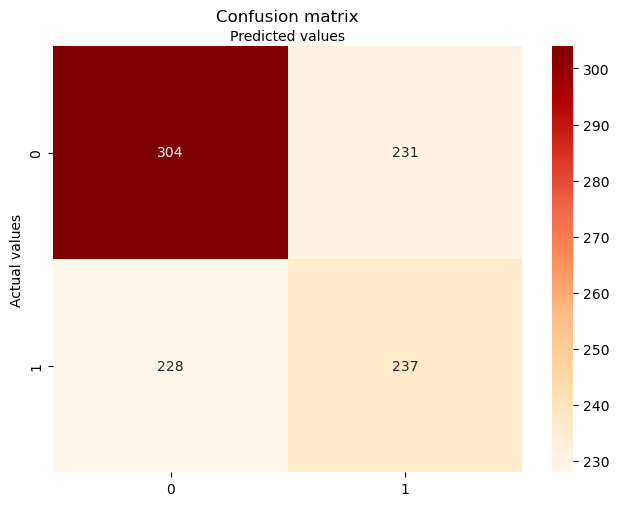

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the graph
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cmatrix), annot=True, cmap="OrRd" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

The above graph illustrates the confusion matrix for the classifications after performing the model.

# Tuning parameters for Random Forest

In [40]:
# Importing the library
from sklearn.ensemble import RandomForestClassifier

# Importing necessary libraries 

from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

Importing the libraries to perform grid search.

In [41]:
# Performing grid search using random forest classifier
rf = RandomForestClassifier()
rf_clf = GridSearchCV(rf, {
    'n_estimators':[100,200,300],
    'random_state':[42,52]
}, cv=5, return_train_score=False)

Grid search cross validation is a method to search through the best parameter values from the given set of parameters. It basically divides the data into training sets and test set and performs cross validations by iterating through the different sets. Here, we have given cv value to be 5 which divides the data to 4 train and 1 test sets. We have used two different values for random state to give same results for each definite values of parameters and three different values for number of estimators which helps to improve the accuracy. 

In [42]:
# Fit the classifier to the data
rf_clf.fit(X_train, y_train)
rf_clf.cv_results_ 

{'mean_fit_time': array([ 9.14260144,  9.18593721, 18.3367764 , 18.26891952, 27.86868768,
        27.09748268]),
 'std_fit_time': array([0.16455107, 0.09200843, 0.29131921, 0.13531923, 0.183791  ,
        1.67092093]),
 'mean_score_time': array([0.07351346, 0.06558161, 0.11875296, 0.12501659, 0.19384871,
        0.18749065]),
 'std_score_time': array([9.21477989e-03, 6.26746328e-03, 7.65492891e-03, 2.67520520e-05,
        2.13153310e-02, 7.07966538e-05]),
 'param_n_estimators': masked_array(data=[100, 100, 200, 200, 300, 300],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_random_state': masked_array(data=[42, 52, 42, 52, 42, 52],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100, 'random_state': 42},
  {'n_estimators': 100, 'random_state': 52},
  {'n_estimators': 200, 'random_state': 42},
  {'n_estimators': 200, '

We fit the model for input and output features and gathered the results.

In [46]:
rf_dfs = pd.DataFrame(rf_clf.cv_results_)
rf_dfs[['params','mean_test_score']]

,params,mean_test_score
0,"{'n_estimators': 100, 'random_state': 42}",0.53075
1,"{'n_estimators': 100, 'random_state': 52}",0.51675
2,"{'n_estimators': 200, 'random_state': 42}",0.53225
3,"{'n_estimators': 200, 'random_state': 52}",0.52800
4,"{'n_estimators': 300, 'random_state': 42}",0.53375
5,"{'n_estimators': 300, 'random_state': 52}",0.52575


The above table gives the information about the different parameters used to get the mean test scores.

In [49]:
rf_clf.best_params_

{'n_estimators': 300, 'random_state': 42}

The best parameter to be used is number of estimators with the value of 300 and random state with the value of 42.

In [50]:
# Performing the model

rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)

rf_classifier.fit(X_train, y_train)
# Predicting the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.57


After using the best parameter for the model, we are getting the accuracy score of 0.57 which is the best score for the random forest model.

In [51]:
# Displaying the metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.59      0.60       535
           1       0.54      0.54      0.54       465

    accuracy                           0.57      1000
   macro avg       0.57      0.57      0.57      1000
weighted avg       0.57      0.57      0.57      1000



The above classification report gives the f1 score, recall and precision of 0.6 for classification 0 and 0.54 for classification 1.

# Neural Network Models

# LSTM Model

In [83]:
# Importng the libraries to perform LSTM
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,MaxPooling1D, GlobalMaxPooling1D
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.regularizers import l2 
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers

We are importing the required libraries to perform LSTM model.

In [52]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=50, input_length=1000))  
model.add(Bidirectional(layers.LSTM(units=50, kernel_regularizer=l2(0.1)))),
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

We are defining the LSTM model by adding embedding layer having input dimensions to the length of sequence and output dimensions to have only 50 values of sequences. We have added bidirectional layer which helps to read the sequneces in two ways to give the better result. We have used 50 neurons to perform the operation and added two methods L2 regularization and dropout to avoid overfitting. The activation function used here is sigmoid which helps to use the important information and suppress the irrelevant datapoints. While compiling, we are using adam optimizer which helps to minimize the loss function. Binary cross entropy is been used as we are dealing with binary outcomes which helps to measure the difference between predicted and actual labels.

In [53]:
# Train the model
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=1)
history = model.fit(X_train, y_train, epochs=6, batch_size=32, validation_split=0.2,callbacks=[earlyStop])

Epoch 1/6


125/125 [==============================] - 83s 623ms/step - loss: 6.1993 - accuracy: 0.5905 - val_loss: 1.5066 - val_accuracy: 0.5530
Epoch 2/6
125/125 [==============================] - 80s 639ms/step - loss: 0.7536 - accuracy: 0.8075 - val_loss: 0.4787 - val_accuracy: 0.8110
Epoch 3/6
125/125 [==============================] - 82s 655ms/step - loss: 0.2634 - accuracy: 0.9277 - val_loss: 0.4638 - val_accuracy: 0.8110
Epoch 4/6
125/125 [==============================] - 80s 639ms/step - loss: 0.3309 - accuracy: 0.8825 - val_loss: 0.6281 - val_accuracy: 0.7140
Epoch 4: early stopping


We are training the model using fit function keeping validation set to 20% with the batch size of 32. We are defining early stopping by monitoring the validation loss with the patience value to be 1 as the model is complex for the data and trained for longer period.

In [351]:
# Predicting the test set
y_pred  = model.predict(X_test)

32/32 [==============================] - 18s 519ms/step


We are predicting the test set data using predict function to compare the values of trained data with the test data.

In [352]:
# Labelling the values to 0 and 1
for each in range(len(y_pred)):
    if y_pred[each] > 0.5:
        y_pred[each] = 1
    else:
        y_pred[each] = 0

The outcome values which we are focusing are 0 and 1 and since the outcome values are continuous, we are labelling the values to zero which are less than 0.5 and labelling the values to one which are greater than 0.5. 

In [353]:
# Viewing the report 
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.75      0.81       600
         1.0       0.69      0.84      0.76       400

    accuracy                           0.79      1000
   macro avg       0.78      0.80      0.78      1000
weighted avg       0.80      0.79      0.79      1000



The classification report gives the values of f1-score, recall and precision. The value of the accuracy is 0.79 for the trained LSTM model.

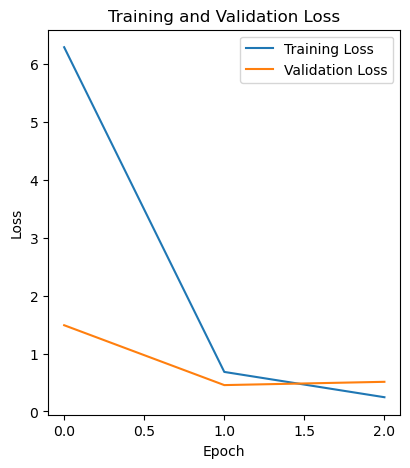

In [354]:
# Plotting the curve for training and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

The above plot gives the graph for Training and Validation Loss.

# Tuning parameters for LSTM

In [165]:
# Performing parameter tuning
from sklearn.metrics import accuracy_score
acc_scores={}
units_=[20,30,40,50,60]
for i in units_:
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=1000))
    model.add(Bidirectional(layers.LSTM(units=i, kernel_regularizer=l2(0.1)))),
    model.add(Dropout(0.1))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=1)
    model.fit(X_train, y_train, epochs=5, batch_size=200, validation_split = 0.2,callbacks=[earlyStop], verbose = 1)
    y_pred  = model.predict(X_test)
    for each in range(len(y_pred)):
        if y_pred[each] > 0.5:
            y_pred[each] = 1
        else:
            y_pred[each] = 0
    acc_scores[i]=accuracy_score(y_pred, y_test)
print(acc_scores)

Epoch 1/5
16/16 [==============================] - 83s 5s/step - loss: 16.2885 - accuracy: 0.9194 - val_loss: 14.0062 - val_accuracy: 1.0000
Epoch 2/5
16/16 [==============================] - 77s 5s/step - loss: 12.1969 - accuracy: 1.0000 - val_loss: 10.2484 - val_accuracy: 1.0000
Epoch 3/5
16/16 [==============================] - 83s 5s/step - loss: 8.8839 - accuracy: 1.0000 - val_loss: 7.5176 - val_accuracy: 1.0000
Epoch 4/5
16/16 [==============================] - 80s 5s/step - loss: 6.5334 - accuracy: 1.0000 - val_loss: 5.5180 - val_accuracy: 1.0000
Epoch 5/5
16/16 [==============================] - 79s 5s/step - loss: 4.7783 - accuracy: 1.0000 - val_loss: 4.0163 - val_accuracy: 1.0000
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001EBC247F100>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a 

We are performing parameter tuning for LSTM model by changing the values for the number of neurons in the bidirectional layer from 20 to 60. All the different values of neurons are giving good results with good accuracy. The bidirectional layer having 50 neurons is giving the best accuracy of 100% from the very first epoch and it is considered to be the best parameter for the model to be trained.

In [167]:
# Runing the model after tuning the parameters
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=1000))
model.add(Bidirectional(layers.LSTM(units=50, kernel_regularizer=l2(0.1)))),
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=1)
model.fit(X_train, y_train, epochs=5, batch_size=200, validation_split = 0.2,callbacks=[earlyStop], verbose = 1)
y_pred  = model.predict(X_test)
for each in range(len(y_pred)):
    if y_pred[each] > 0.5:
        y_pred[each] = 1
    else:
        y_pred[each] = 0

Epoch 1/5
16/16 [==============================] - 575s 36s/step - loss: 23.3962 - accuracy: 0.9441 - val_loss: 18.9841 - val_accuracy: 1.0000
Epoch 2/5
16/16 [==============================] - 559s 35s/step - loss: 15.8660 - accuracy: 1.0000 - val_loss: 12.8247 - val_accuracy: 1.0000
Epoch 3/5
16/16 [==============================] - 561s 35s/step - loss: 10.7100 - accuracy: 1.0000 - val_loss: 8.5815 - val_accuracy: 1.0000
Epoch 4/5
16/16 [==============================] - 5638s 34s/step - loss: 7.1126 - accuracy: 1.0000 - val_loss: 5.6439 - val_accuracy: 1.0000
Epoch 5/5
16/16 [==============================] - 564s 36s/step - loss: 4.6425 - accuracy: 1.0000 - val_loss: 3.6470 - val_accuracy: 1.0000
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001EBC201CB80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should defin

After hypertuning the LSTM model, we performed training the LSTM model with 50 neurons in the bidirectional layer to check the accuracy score and we got the value of 1 as expected.

In [171]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



The LSTM model is giving the accuracy 1 after tuning the hyperparameters as discussed.

# GRU

In [90]:
# Importing the necessary libraries
from tensorflow.keras.layers import Embedding, GRU

Importing the libraries to perform GRU model

In [91]:
# Define the GRU model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=50, input_length=1000))
model.add(Bidirectional(layers.GRU(units=50, kernel_regularizer=l2(0.1)))),
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

We are defining the GRU model by adding embedding layer having input dimensions to the length of sequence and output dimensions to have only 50 values of sequences. We have added bidirectional layer which helps to read the sequneces in two ways to give the better result. We have used 50 neurons to perform the operation and added two methods L2 regularization and dropout to avoid overfitting. The activation function used here is sigmoid which helps to use the important information and suppress the irrelevant datapoints. While compiling, we are using adam optimizer which helps to minimize the loss function. Binary cross entropy is been used as we are dealing with binary outcomes which helps to measure the difference between predicted and actual labels.

In [92]:
# Train the model
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=1)
hist = model.fit(X_train, y_train, epochs=6, batch_size=32, validation_data=(X_test, y_test),callbacks=[earlyStop])

Epoch 1/6
125/125 [==============================] - 64s 471ms/step - loss: 6.4590 - accuracy: 0.5602 - val_loss: 1.8011 - val_accuracy: 0.7790
Epoch 2/6
125/125 [==============================] - 60s 478ms/step - loss: 0.9241 - accuracy: 0.8105 - val_loss: 0.4929 - val_accuracy: 0.8500
Epoch 3/6
125/125 [==============================] - 56s 447ms/step - loss: 0.2808 - accuracy: 0.9287 - val_loss: 0.4023 - val_accuracy: 0.8620
Epoch 4/6
125/125 [==============================] - 56s 446ms/step - loss: 0.2584 - accuracy: 0.9450 - val_loss: 0.5007 - val_accuracy: 0.8240
Epoch 4: early stopping


We are training the model using fit function keeping validation set to 20% with the batch size of 32. We are defining early stopping by monitoring the validation loss with the patience value to be 1 as the model is complex for the data and trained for longer period. Here, the training is stopped in the 4th epoch.

In [93]:
y_pred  = model.predict(X_test)

32/32 [==============================] - 6s 147ms/step


We are predicting the trained model with the test set.

In [94]:
for each in range(len(y_pred)):
    if y_pred[each] > 0.5:
        y_pred[each] = 1
    else:
        y_pred[each] = 0

The outcome values which we are focusing are 0 and 1 and since the outcome values are continuous, we are labelling the values to zero which are less than 0.5 and labelling the values to one which are greater than 0.5. 

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       535
           1       0.83      0.79      0.81       465

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



We are viewing the classification report after performing the GRU model and we are getting 0.82 as the accuracy score.

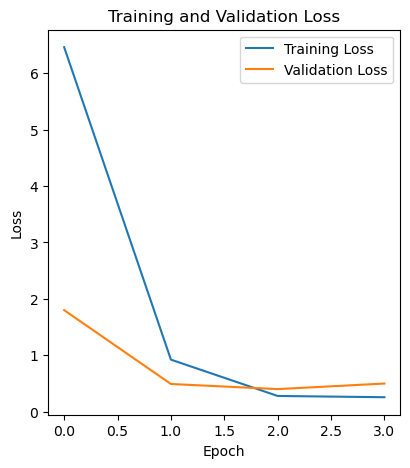

In [100]:
# Plotting the curve for training and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

The above plot gives the curves for validation loss and the training loss.

# Tuning Parameters for GRU

In [101]:
# Performing parameter tuning
from sklearn.metrics import accuracy_score
acc_scores={}
units_=[20,30,40,50,60]
for i in units_:
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=1000))
    model.add(Bidirectional(layers.GRU(units=i, kernel_regularizer=l2(0.1)))),
    model.add(Dropout(0.1))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=1)
    model.fit(X_train, y_train, epochs=5, batch_size=200, validation_split = 0.2,callbacks=[earlyStop], verbose = 1)
    y_pred  = model.predict(X_test)
    for each in range(len(y_pred)):
        if y_pred[each] > 0.5:
            y_pred[each] = 1
        else:
            y_pred[each] = 0
    acc_scores[i]=accuracy_score(y_pred, y_test)
print(acc_scores)

Epoch 1/5
16/16 [==============================] - 52s 3s/step - loss: 14.0644 - accuracy: 0.5059 - val_loss: 12.3110 - val_accuracy: 0.6150
Epoch 2/5
16/16 [==============================] - 48s 3s/step - loss: 10.9625 - accuracy: 0.6644 - val_loss: 9.5628 - val_accuracy: 0.5612
Epoch 3/5
16/16 [==============================] - 50s 3s/step - loss: 8.4891 - accuracy: 0.8169 - val_loss: 7.4000 - val_accuracy: 0.6888
Epoch 4/5
16/16 [==============================] - 54s 3s/step - loss: 6.5476 - accuracy: 0.8975 - val_loss: 5.7151 - val_accuracy: 0.7150
Epoch 5/5
32/32 [==============================] - 8s 201ms/step
Epoch 1/5
16/16 [==============================] - 246s 15s/step - loss: 17.2408 - accuracy: 0.5228 - val_loss: 14.8706 - val_accuracy: 0.5938
Epoch 2/5
16/16 [==============================] - 244s 15s/step - loss: 13.0749 - accuracy: 0.7816 - val_loss: 11.2191 - val_accuracy: 0.6637
Epoch 3/5
16/16 [==============================] - 253s 16s/step - loss: 9.8237 - accuracy

We are performing parameter tuning for GRU model by changing the values for the number of neurons in the bidirectional layer from 20 to 60. All the different values of neurons are giving good results with good accuracy. The bidirectional layer having 40 neurons is giving the best accuracy of 0.91 and it is considered to be the best parameter for the model to be trained.

In [102]:
# Runing the model after tuning the parameters
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=1000))
model.add(Bidirectional(layers.GRU(units=40, kernel_regularizer=l2(0.1)))),
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=1)
model.fit(X_train, y_train, epochs=5, batch_size=200, validation_split = 0.2,callbacks=[earlyStop], verbose = 1)
y_pred  = model.predict(X_test)
for each in range(len(y_pred)):
    if y_pred[each] > 0.5:
        y_pred[each] = 1
    else:
        y_pred[each] = 0

Epoch 1/5
16/16 [==============================] - 389s 24s/step - loss: 19.8662 - accuracy: 0.5306 - val_loss: 16.9304 - val_accuracy: 0.6225
Epoch 2/5
16/16 [==============================] - 480s 30s/step - loss: 14.7320 - accuracy: 0.7841 - val_loss: 12.4711 - val_accuracy: 0.6875
Epoch 3/5
16/16 [==============================] - 473s 30s/step - loss: 10.7933 - accuracy: 0.8609 - val_loss: 9.1002 - val_accuracy: 0.7412
Epoch 4/5
16/16 [==============================] - 478s 30s/step - loss: 7.7421 - accuracy: 0.8528 - val_loss: 6.4753 - val_accuracy: 0.8037
Epoch 5/5
32/32 [==============================] - 13s 377ms/step


After hypertuning the GRU model, we performed training the GRU model with 40 neurons in the bidirectional layer to check the accuracy score and we got the value of 0.89 which is near to the expected value.

In [103]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       538
         1.0       0.80      0.80      0.80       462

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.82      0.81      0.82      1000



The GRU model is giving the accuracy 0.81 after tuning the hyperparameters as discussed.

# Conclusion

| SL No | Model Name | Accuracy |
|-----|----------|--------|
|1|Logistic Regression|0.49|
|2|Random Forest|0.57|
|3|SVM|0.88|
|4|GRU|0.81|
|5|LSTM|1.00|

Among every models discussed, the LSTM neural network model is giving us the highest accuracy score of 1 after hypertuning the parameters by changing the number of neurons which tells us that it is predicting the classifications 100%. The GRU and the SVM  models are giving the accuracy of 0.81 and 0.88 respectively after hypertuning the models by changing the number of neurons for GRU and changing the kernels for SVM. By the help of these models, it will be helpful to classify the positive and negative responses of the IMDB rated movies and will also be helpful to recommend movies for the viewers. This will help the movie industries and their businesses by understanding the viewers likeliness on the genres and content of the movies, and they cast light on the overall quality of the production, including the acting, writing, and directing. It may also help the actors to choose the script based on the ratings of the movies by seeing the opinions of the viewers.